<center>
<h1>第六章：机器学习项目的管理应用</h1>
<h2>预测分析</h2>
<h3>中科大管理学院</h3>
</center>


* The lecture is based on Chapter 2 in "Hands-on ML with scikit-learn and TensorFlow" by Aurelien Geron. All rights are reserved to Aurélien Geron and O'Reilly Media.
* The code was modified for the purpose of this lecture. The original and complete code can be download from [here](https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb).

# 本章概要


* ML项目的实践
    * 主要步骤
    * 示例分析
    * 基本概念 
    * 应用实践

# ML项目步骤

1. 问题抽象化，高屋建瓴地看待和分析问题（big picture）
2. 获取数据
3. 分析数据以获得一些管理思路和想法（insights）
4. 对数据进行预处理，使得数据呈现出更好的结构形式，适用于ML算法
5. 对多种模型进行尝试，并筛选出最优模型
6. 调整（fine-tune）和整合模型，以获得更好的结果
7. 展示结果
8. 系统设立、监测及维护


## 1. The Big Picture

* 建立California的房价预测模型

<center><img src="images/figure2-1.png" style="width: 50%;"></center>

* 以600-3000人为一组，对每组进行数据侧写
    - median income
    - median household price
    - location 
    - ...
    

## 问题
* 商业目的是什么? 
* 如何利用模型的输出? 
    - 这一问题的答案将影响模型的选择及模型表现的衡量方法
* 在我们做这个问题前，当下的结果是什么？(benchmark)

* Supervised vs. unsupervised? 

* Classification vs. regression?

* Performance measure? 

* 回归模型的表现通常由如下标准进行判定:
    - Root mean square error (RMSE):  $\sqrt{\frac{1}{m}\sum_{i=1}^{m}{(h(x^i)-y^i)}^2}$
    - Mean absolute error (MAE): $\frac{1}{m}\sum_{i=1}^{m}|h(x^i)-y^i|$
    

# 2. 数据获取
 
* 本示例的数据集为 'data/housing.csv'，源于 [[1](http://shop.oreilly.com/product/0636920052289.do)]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

housing = pd.read_csv('data/housing.csv') # load data
housing.head()                            # inspect data structure 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 数据分析
* 数据集大小，数据类型，有没有数据缺失，... 

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* 20640条记录
* 10 列
* total_bedrooms中存在数据缺失问题
* ocean_proximity具体存在哪些信息？

## 数据分析

In [3]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 数据分析

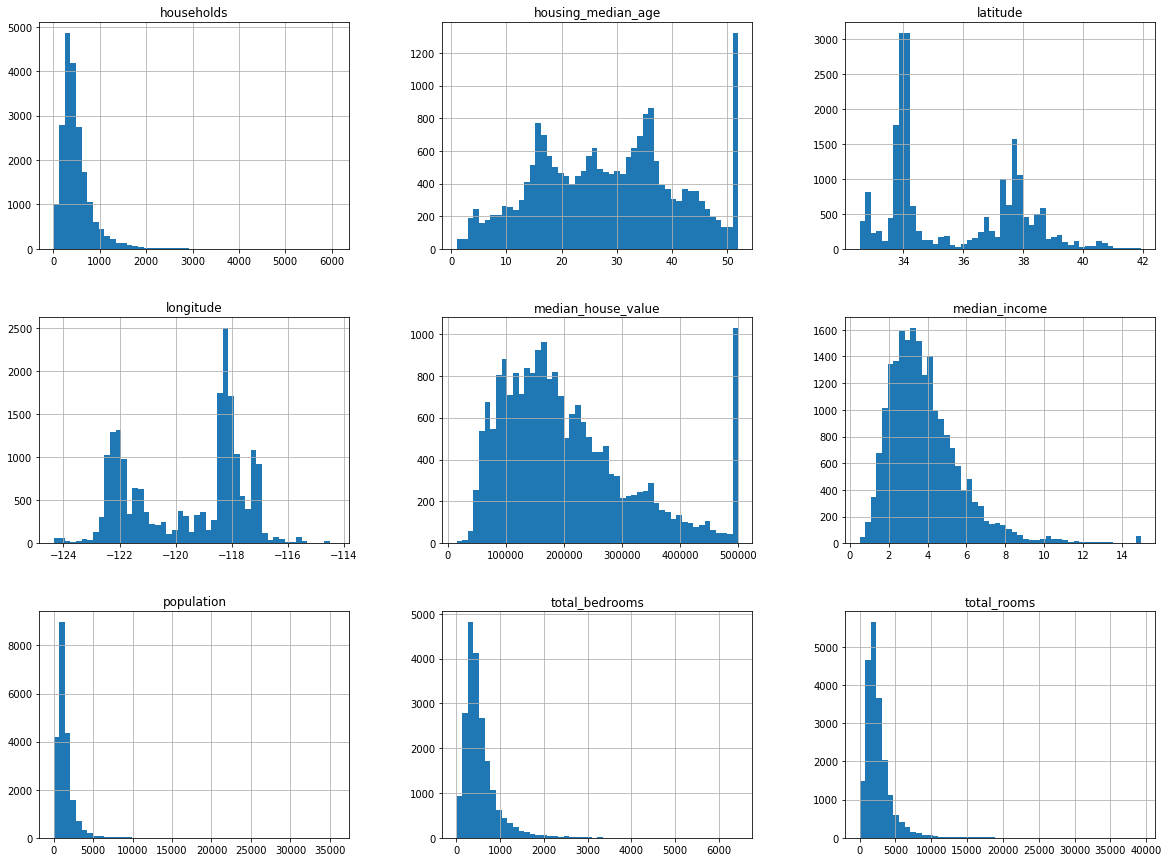

In [6]:
housing.hist(bins=50, figsize=(20,15))
pass

## 观测结果
1. meidan income 在数据scale之内
2. median_house_value 及 housing_median_age 出现了数据截断现象
    - 可能的原因 (算法没有能够估计更高的价格)
    - 可能的解决方案: 获取更多数据，或删除截断部分的数据点
3. 不同特征对应的数据scale不一样 
4. 重尾分布

可以考虑数据转化、变化以解决3、4两个问题

 
 

## 创建测试集

* 测试集 - 该部分数据不用于建立模型，而用于最终的模型表现测试
* 训练集 - 该部分数据用于建立模型

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=1)

In [8]:
print(housing.shape, train_set.shape, test_set.shape)

(20640, 10) (16512, 10) (4128, 10)


In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 15961 to 235
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16349 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


* random_state - 确保对train和test数据集多次重复运行code时候的稳定性;随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填None，每次都会不一样。
* 其他数据划分方法，请参见 [[1](http://shop.oreilly.com/product/0636920052289.do)]
    1. consistently split data when new data is added 
    2. avoid sampling bias using stratified sampling (e.g., men vs. women)


## 3. 数据分析及思路获取

* 以下，我们仅使用训练集
* 若训练集太大，可以抽取部分样本

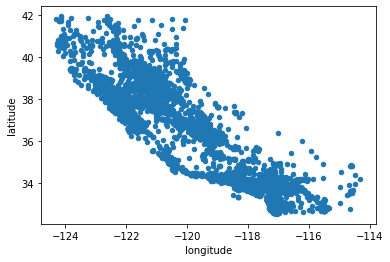

In [10]:
housing = train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude')

<center><img src="images/california.png" style="width: 20%;"></center>

## 可视化

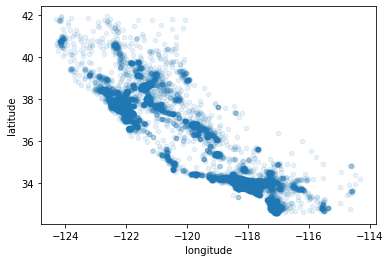

In [11]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

通过增加点的透明度，可以获取点在地理位置上聚集的密度信息

## 可视化

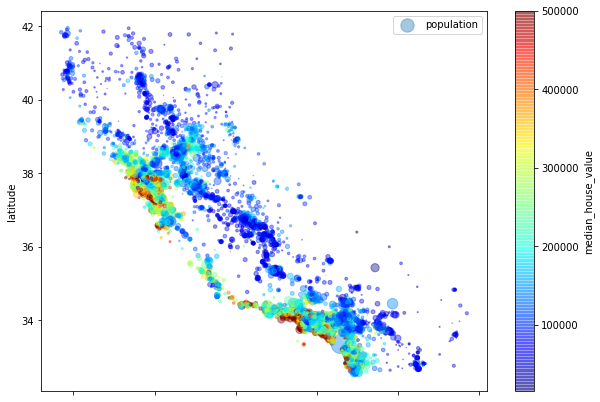

In [12]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
             s=housing["population"]/100, label="population", figsize=(10,7), 
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

* s和c这两个参数只在kind='scatter'下才有，否则会报错
* s代表点的大小，c为每个点赋予颜色
* 颜色代表价格（越靠近海边，价格越高）
* 大小代表社区大小（人口聚集度越高似乎可以增加房屋价格）

## (Pearson's) 相关系数 
* 取值范围为 -1 到 1
* 基于两个随机变量(two columns)
* 研究两个变量是否线性相关

<center><img src="images/correlation.png" style="width: 50%;"></center>

* 无法刻画非线性关系

## (Pearson's) 相关系数

In [13]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925246,-0.106156,0.037578,0.065412,0.095861,0.049854,-0.018227,-0.050893
latitude,-0.925246,1.000000,0.009373,-0.029916,-0.063107,-0.105325,-0.066939,-0.076734,-0.139374
housing_median_age,-0.106156,0.009373,1.000000,-0.361784,-0.319623,-0.296996,-0.301496,-0.123550,0.105758
total_rooms,0.037578,-0.029916,-0.361784,1.000000,0.929219,0.854458,0.916737,0.201318,0.135514
total_bedrooms,0.065412,-0.063107,-0.319623,0.929219,1.000000,0.875187,0.979268,-0.006820,0.050560
population,0.095861,-0.105325,-0.296996,0.854458,0.875187,1.000000,0.905040,0.007521,-0.023884
households,0.049854,-0.066939,-0.301496,0.916737,0.979268,0.905040,1.000000,0.013801,0.066801
median_income,-0.018227,-0.076734,-0.123550,0.201318,-0.006820,0.007521,0.013801,1.000000,0.688194
median_house_value,-0.050893,-0.139374,0.105758,0.135514,0.050560,-0.023884,0.066801,0.688194,1.000000


## (Pearson's) 相关系数

In [14]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688194
total_rooms           0.135514
housing_median_age    0.105758
households            0.066801
total_bedrooms        0.050560
population           -0.023884
longitude            -0.050893
latitude             -0.139374
Name: median_house_value, dtype: float64

## (Pearson's) 相关系数

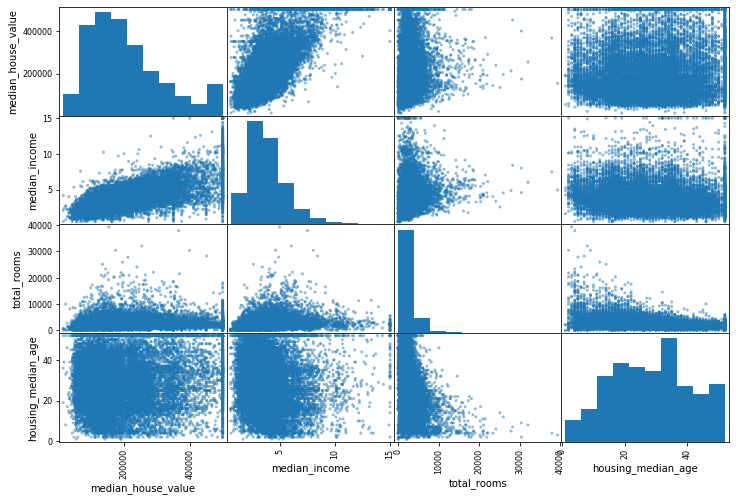

In [15]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
pass

* median_income 看起来是最适合用于预测房屋价格的变量

## (Pearson's) 相关系数

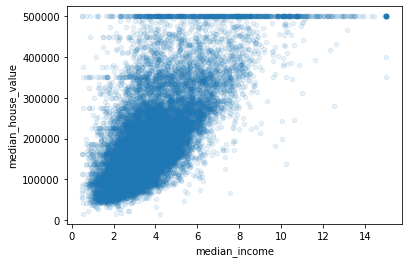

In [16]:
housing.plot(kind='scatter',x="median_income", y="median_house_value", alpha=0.1)

* 看起来像线性关系
* 500k位置的水平线 (在 450k 及 350k位置也出现了水平线痕迹），预示着数据可能存在某些问题

## 特征组合实验（Experimenting with attributes combinations）

In [17]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.574288,35.632194,28.604469,2639.590661,539.049544,1425.257146,500.593508,3.876149,207735.064196
std,2.007578,2.137087,12.586046,2176.421777,420.893714,1123.756792,382.439609,1.891584,115594.530574
min,-124.300000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1451.000000,296.000000,786.000000,279.000000,2.572050,120600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1164.000000,410.000000,3.544550,180600.000000
75%,-118.010000,37.710000,37.000000,3149.000000,647.000000,1723.000000,605.250000,4.750000,266000.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


* total_rooms, total_bedrooms 是社区总量; 可以考虑scale（单位调整）

## 特征组合实验

In [18]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing["population"]/housing['households']

In [19]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688194
rooms_per_household         0.146508
total_rooms                 0.135514
housing_median_age          0.105758
households                  0.066801
total_bedrooms              0.050560
population_per_household   -0.021979
population                 -0.023884
longitude                  -0.050893
latitude                   -0.139374
bedrooms_per_room          -0.253361
Name: median_house_value, dtype: float64

* bedrooms_per_room 可以作为依据去去测房屋价格
* 上述过程属于"Feature Engineering" 
* 这是一个迭代过程
* Domain knowledge在此体现了价值

# 4. 数据预处理

* 数据清洗
* 处理文本及类别标签特征（categorical attributes）
* 转化及单位调整（Transformations and scaling）


* Create data pipelines
    - Reproducable code
    - Use with new data
    - Test various transformations
    

## 数据清理
* 缺失数据
    1. 删除观测结果    
    2. 删除特征
    3. 填补缺失数据 (e.g., 0, mean, media, ...)

In [20]:
housing = train_set.copy().drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

print('before', housing.shape)
housing.dropna(subset=["total_bedrooms"], inplace=True) # option 1
print('after', housing.shape)

before (16512, 9)
after (16349, 9)


In [21]:
housing = train_set.copy().drop("median_house_value", axis=1)
print('before', housing.shape)
housing.drop("total_bedrooms", axis=1, inplace=True)     # option 2
print('after', housing.shape)

before (16512, 9)
after (16512, 8)


## 数据清理

In [22]:
housing = train_set.copy().drop("median_house_value", axis=1)
print('before', housing.shape)

before (16512, 9)


In [23]:
median = housing["total_bedrooms"].median()        # option 3
median

435.0

In [24]:
housing["total_bedrooms"].fillna(median, inplace=True)
print('after', housing.shape)
housing.info()

after (16512, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 15961 to 235
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [25]:
housing = train_set.copy().drop("median_house_value", axis=1) # restore original values

## 数据清理

* Imputer - sklearn的缺失值处理器，用于填补缺失值(mean, median, most frequent)
* 用numerical values填补columns中的缺失值

In [26]:
housing_num = housing.copy().drop("ocean_proximity", axis=1) # numerical values in 'housing'

In [27]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median") # only works on numerical values

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
imputer.fit(housing_num)   # initialize object
print(imputer.statistics_) # print interval values (media)
print(housing_num.median().values)

[-118.49      34.26      29.      2127.       435.      1164.
  410.         3.54455]
[-118.49      34.26      29.      2127.       435.      1164.
  410.         3.54455]


In [29]:
X = imputer.transform(housing_num) # transform all numerical values in data frame (returns matrix without labels)
housing_tr = pd.DataFrame(X, columns=housing_num.columns) # add column names
housing_tr.info() # show statistics on transformed data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


## 文本及分类标签的处理（text and categorical attributes）

* 通常，在运行程序前，须将文本信息转化为数值
* LabelEconder - 对分类标签 ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'] 赋值

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat) # single command for fit and transform 
housing_cat_encoded

array([3, 3, 1, ..., 0, 1, 3])

In [31]:
encoder.classes_ # internal data

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

## 文本及分类标签的处理

* 另一种处理方法：0-1变量
* 将以下的每个标签 ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'] 作为一个column，用0-1变量指示YES OR NO
* 例如: 加入第一行值为 '<1H OCEAN', 那么5列对应的值为 [1,0,0,0,0]
* 0-1变量的转换要求输入为matrix

In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) # fit_transform expects matrix and housing_cat_encoded is a vector; reshape transforms the vector into a matrix
housing_cat_1hot 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [33]:
housing_cat_encoded[:5]

array([3, 3, 1, 0, 0])

In [34]:
housing_cat_1hot[:5,:].toarray() # print first 5 rows

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

## 文本及分类标签的处理


In [35]:
# error in the book (temporary solution until the next verseion of sklearn)
%run CategoricalEncoder.py

<Figure size 432x288 with 0 Axes>

In [36]:
cat_encoder = CategoricalEncoder(encoding="onehot-dense")
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [37]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 特征单位变换（Feature Scaling）

* 有些算法可能会对特征的单位敏感
* 例如，考虑一列取值范围为 [0,100000] 的数值，以及另一列取值范围在 [0,1] 的数值
* 通常有两种scaling方法
    - min-max: 使得数值范围变为 [0,1] (subtract min and divide by max-min)
    - 标准化: 变为服从均值为0，标准方差为1的分布 (subtract mean and divide by standard deviation)

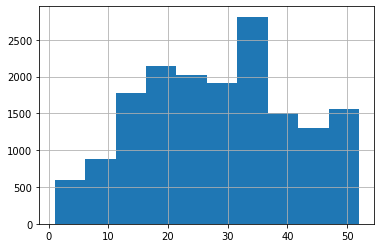

In [38]:
housing["housing_median_age"].hist()

## Min-max scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaled_values = scaler.fit_transform(housing[["housing_median_age"]]) # matrix
#scaled_values
scaled_values = scaler.fit_transform(housing[["housing_median_age"]]).reshape(-1)
scaled_values

array([1.        , 0.80392157, 0.29411765, ..., 0.80392157, 0.17647059,
       0.66666667])

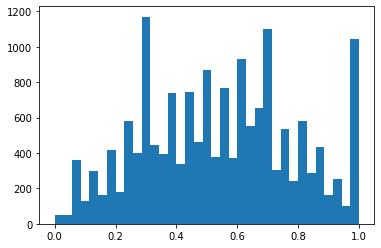

In [45]:
plt.hist(scaled_values, bins='auto') 
pass

* 注意上图中横轴的坐标变化

## Standardization

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(housing[["housing_median_age"]]).reshape(-1)

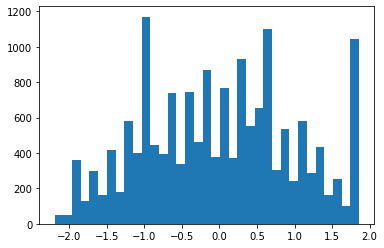

In [47]:
plt.hist(scaled_values, bins='auto') 
pass

* 注意上图中的 x-axis

## 自定义转化器
* sklearn 支持自定义转化器
* 例如: 选取表格中一部分columns（即features）并将其转化为numpy array

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attibute_names):
        self.attibute_names = attibute_names
    def fit(self, X, y=None):
        return(self)
    def transform(self, X): 
        return(X[self.attibute_names].values)

## 自定义转化器
* 上述示例: transformer that selects a subset of columns from a dataframe and coverts it to numpy array

In [43]:
attibute_list = ['longitude', 'latitude']
df_selector = DataFrameSelector(attibute_list)
df_selector.fit_transform(train_set)

array([[-122.43,   37.71],
       [-122.35,   37.95],
       [-121.24,   37.9 ],
       ...,
       [-118.26,   33.93],
       [-117.16,   33.73],
       [-122.2 ,   37.79]])

In [44]:
train_set[attibute_list].head()

,longitude,latitude
15961,-122.43,37.71
1771,-122.35,37.95
16414,-121.24,37.90
5056,-118.35,34.02
8589,-118.39,33.89


## 数据管道（Pipelines）

* 在完成数据转换之后
    - 如何基于validation/test数据进行预测？
    - 如何基于新数据点进行预测？ 
* scikit learn 可以建立数据管道（pipelines）管理数据流（flow of data）
* 数据管道会连续地调用数据转换

In [45]:
# reminder
housing = train_set.copy().drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

* 我们将整个数据预处理的工作在一段code block中整合：

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

cat_attributes = ['ocean_proximity']
num_attributes = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attributes)),
    ('imputer',Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attributes)),
    ('label_binarizer',CategoricalEncoder(encoding="onehot-dense")),])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 13)

# 5. 模型选择

* 以下，开始进行模型训练和选择

In [47]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

具体预测结果如下

In [48]:
some_data = housing.iloc[:5,:]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Labels:", list(some_labels))
print("Predictions:", lin_reg.predict(some_data_prepared))

Labels: [255600.0, 114600.0, 137500.0, 118800.0, 422700.0]
Predictions: [231380.62292555 226865.86733562  96381.53832093 188063.17311262
 378872.31271645]


### 表现

In [49]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68665.01820910817

In [50]:
housing_labels.describe()

count     16512.000000
mean     207735.064196
std      115594.530574
min       14999.000000
25%      120600.000000
50%      180600.000000
75%      266000.000000
max      500001.000000
Name: median_house_value, dtype: float64

* 这一模型欠拟合(MSE过大)，解决方案为
    - 使用更多数据
    - 使用其他更适用的模型
    - 减少正则化（注：正则化是用于降低过拟合）

## 第二尝试 - 决策树

In [51]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [52]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

* 结果似乎过于“完美”地契合了数据？

* 极大可能为过拟合
* 需要适用train data之外的数据对模型表现进行评定
    - Validation set approach
    - Cross-validation (more accurate but costly)
    

## 决策树（续）

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [54]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [55]:
display_scores(tree_rmse_scores)

Scores: [71281.99290671 67060.89193171 69575.75203881 66923.11162147
 68229.17232429 71304.48217667 67196.66430105 68882.39722369
 69096.68469715 63905.48853365]
Mean: 68345.66377552199
Standard deviation: 2108.6746312071687


* Measure for accuracy (mean value) and precision (std. deviation)

In [56]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70795.22349587 66352.20245888 70387.57994259 69729.17724427
 69333.03932304 68709.73839101 65024.05467211 68772.85293195
 68921.09386803 70046.70225139]
Mean: 68807.16645791414
Standard deviation: 1716.8460861111716


## 第三尝试- Random Forests

In [57]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
for_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
for_rmse_scores = np.sqrt(-for_scores)
display_scores(for_rmse_scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Scores: [52577.98776941 51038.64891995 50623.12619409 52193.01004489
 50935.24792364 52538.34968768 48405.01834028 52284.11973533
 52469.4928159  50745.11769671]
Mean: 51381.01191278745
Standard deviation: 1248.3238851271199


* Much better..

* 此时 考虑： 
    1. 测试更多模型 (SVM models, neural networks, etc. ) 找出小部分较为靠谱的模型
    2. 存储合适的模型 (the model disappears once we close the Python environment)


In [58]:
from sklearn.externals import joblib
joblib.dump(forest_reg, 'for_reg.pkl')

['for_reg.pkl']

In [60]:
for_reg2 = joblib.load('for_reg.pkl')

In [61]:
for_reg2

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# 6. 调参

* 模型表现依赖于参数设置 
* E.g., Decision-trees vary based on 
    * Tree depth
    * Nodes per leaf
    * Optimization criteria
    * ...
* The process of finding the set of hyper-parameters is called "hyper-parameter tuning"


## Hyper-parameter tuning 
[RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
              {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

## Hyper-parameter tuning - cont.

In [63]:
cvres = grid_search.cv_results_ # the variable that stores the grid search results
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):  # iterate over the tested configurations
    print(np.sqrt(-mean_score), params)

63518.39984941464 {'max_features': 2, 'n_estimators': 3}
55284.16720415697 {'max_features': 2, 'n_estimators': 10}
52459.92031122053 {'max_features': 2, 'n_estimators': 30}
59392.34219620762 {'max_features': 4, 'n_estimators': 3}
52483.15618254439 {'max_features': 4, 'n_estimators': 10}
50438.85585194096 {'max_features': 4, 'n_estimators': 30}
58276.98060177749 {'max_features': 6, 'n_estimators': 3}
51872.023892860496 {'max_features': 6, 'n_estimators': 10}
50106.298008392674 {'max_features': 6, 'n_estimators': 30}
57482.01002618836 {'max_features': 8, 'n_estimators': 3}
51987.67259721773 {'max_features': 8, 'n_estimators': 10}
49943.511166155455 {'max_features': 8, 'n_estimators': 30}
62327.38032991405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53935.78976925762 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59736.26260978387 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52251.94574878583 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [64]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

* May want to consider evaluating larger values of 'max_features' and 'n_estimators'

In [65]:
grid_search.best_estimator_ # variable holding the best classifier (fitted on the entire dataset)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## 其他调参方法

- random search (RandomizedSearchCV) 
    - generate random values for the hyper-parameters
    - try more values
    - directly control running time
- Advanced optimiztion methods: Bayesian optimization, gradient-based methods, Meta-heuristisc, etc.
    

## 基于test set的模型表现分析
* Performed once we finalized a model (and its hyper-parameters)
* An estimate of the model true performance

In [66]:
final_model = grid_search.best_estimator_
X_test = test_set.copy().drop("median_house_value", axis=1)
Y_test = test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test) # transform and not fit_transform!
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48389.33048235914

In [67]:
np.sqrt(-grid_search.best_score_) # training cross validation error

49943.511166155455

* Avoid reusing test data (contaminate the test set)

## 7. 总结分析结果

* Document everything (data, assumptions, limitations, models tried, etc.)
* Present the big picture
* Explain how the model achieves the business objective
* Use visualization to highlight key findings


## 8. 建立、监测、维护你的系统

1. Prepare solution for production (e.g., connect with input data (online systems), unit tests)
2. Monitor system performance on regular basis and trigger alerts 
3. Retrain model on a regular basis on fresh data
 